# Visualizing Neural Networks

This is a project intended to visualize neural networks. The purpose of this is to strengthen our intuition behind what a NN is, and how our parameters affect the system. We will primarily use **manim** (Mathematical Animation Engine) to animate the structure and operations of a neural network. This included


*  Forward propagation
*  Backpropagation
*  Visualizing weight changes

## 1.) Setting up Manim on Google Colab

To begin, we will run this cell to install the system dependencies. This may be a little troublesome but please bear with us!

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
texlive texlive-latex-extra texlive-fonts-extra \
texlive-latex-recommended texlive-science \
tipa libpango1.0-dev
!pip install manim
!pip install IPython — upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,802 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,540 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages 

Now that it's installed, let's run a sample function to test out the animation. While we did go a bit in depth in the previous notebook, it never hurts to quickly test out what our program does!

# Let's Look at Basic Animations

# Scene #1: Simple Animation - Geometric Figures

In [ ]:
%%writefile scene.py
from manim import *

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Writing scene.py


In [ ]:
!manim -pql scene.py SquareToCircle

Manim Community v0.19.0

[04/02/25 14:38:37] INFO     Animation 0 : Partial movie file written in    ]8;id=262176;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=532626;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/scene/480p15/partial_mo                         
                             vie_files/SquareToCircle/1185818338_513577100_                         
                             223132457.mp4'                                                         
[04/02/25 14:38:38] INFO     Animation 1 : Partial movie file written in    ]8;id=874389;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=205260;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/sc

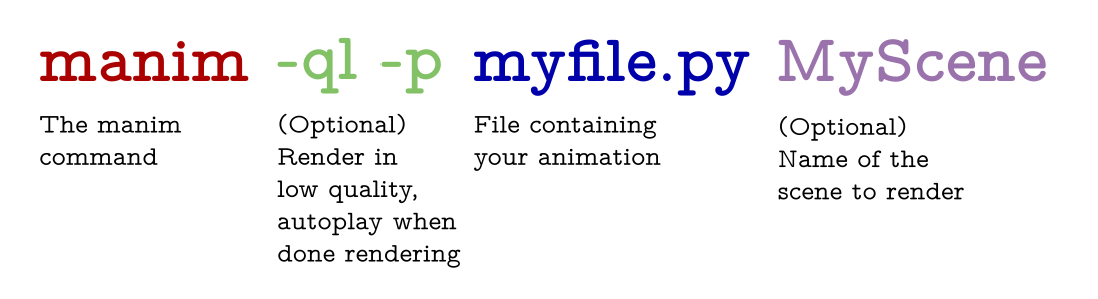

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/SquareToCircle.mp4", embed=True)

# Scene #2: Another Simple Animation - Text

In [ ]:
%%writefile scene.py
from manim import *

class BasicScene(Scene):

    def construct(self):

        # What text do we want to write?
        text = Text("Hi everyone! What's up?!")
        self.add(text)

        # animate the text
        self.play(Write(text))
        self.wait()

        # color the text
        self.play(
            text.animate.set_color(YELLOW)
        )
        self.wait()

Overwriting scene.py


In [ ]:
!manim -pql scene.py BasicScene

Manim Community v0.19.0

[04/02/25 14:38:43] INFO     Animation 0 : Partial movie file written in    ]8;id=109777;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=203153;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/scene/480p15/partial_mo                         
                             vie_files/BasicScene/1185818338_2772301451_217                         
                             0792744.mp4'                                                           
[04/02/25 14:38:44] INFO     Animation 1 : Partial movie file written in    ]8;id=673988;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=70415;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/sce

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/BasicScene.mp4", embed=True)

# Scene #3 - Let's Visualize Exponential Growth

In [ ]:
%%writefile scene.py
from manim import *

class ExponentialGrowth(Scene):
    def construct(self):

        # Create axes to plot exponential function
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 100, 10],
            x_length=10,
            y_length=5,
            axis_config={"include_numbers": True},
        )
        axes.to_edge(UP)

        # Define exponential function
        exp_curve = axes.plot(lambda x: 2 ** x, color=BLUE)

        # Add labels
        exp_label = axes.get_graph_label(exp_curve, label="y=2^x")

        # Animate the plot
        self.play(Create(axes), run_time=2)
        self.play(Create(exp_curve), Write(exp_label), run_time=2)

        # Add explanatory text
        explanation = Text("Exponential Growth: y = 2^x", font_size=24)
        explanation.next_to(axes, DOWN)
        self.play(Write(explanation))

        self.wait(4)

Overwriting scene.py


In [ ]:
!manim -pql scene.py ExponentialGrowth

Manim Community v0.19.0

[04/02/25 14:38:51] INFO     Writing 1 to media/Tex/6ecf9f51170c1a70.tex     ]8;id=147450;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=97785;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:38:52] INFO     Writing 2 to media/Tex/2b7ffb3c38a5a6e0.tex     ]8;id=256116;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=343022;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:38:53] INFO     Writing 3 to media/Tex/8de07035cb22c903.tex     ]8;id=352468;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=999939;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:38:54] INFO     Writing 4 to media/Tex/31d

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/ExponentialGrowth.mp4", embed=True)

# Scene #4 - Let's Visualize How KNN-Neighbors Work in Machine Learning


In [ ]:
%%writefile scene.py
from manim import *

import numpy as np
from manim import *

class KNNVisualization(Scene):
    def construct(self):
        # Data points
        data_points = np.array([
            [1, 2], [1.5, 1.8], [2, 3], [2.5, 2.8],
            [3, 4], [3.5, 3.8], [4, 5], [4.5, 4.8],
            [1, 4], [1.5, 3.8], [2, 5], [2.5, 4.8],
            [3, 6], [3.5, 5.8], [4, 7], [4.5, 6.8]
        ])
        labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

        # New point
        new_point = np.array([2.8, 3.5])
        new_point_3d = np.append(new_point, 0)

        k = 3
        data_points_3d = np.hstack([data_points, np.zeros((data_points.shape[0], 1))])

        # Axes
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 8, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True, "font_size": 28},
        ).to_edge(DOWN)

        # Dots
        dots = []
        for i, point in enumerate(data_points_3d):
            color = BLUE if labels[i] == 0 else RED
            dot = Dot(axes.c2p(point[0], point[1]), color=color)
            dots.append(dot)

        new_point_dot = Dot(axes.c2p(new_point[0], new_point[1]), color=GREEN)

        # Plot axes one by one
        self.play(Create(axes), run_time=0.5)
        self.wait(0.5)

        # Legend
        legend = VGroup(
            Dot(color=BLUE), Text("Class 0", color=BLUE).scale(0.5),
            Dot(color=RED), Text("Class 1", color=RED).scale(0.5),
            Dot(color=GREEN), Text("New Point", color=GREEN).scale(0.5)
        ).arrange_in_grid(rows=3, cols=2, buff=0.3)
        legend.to_corner(UL, buff=1)

        self.play(FadeIn(legend))

        # Plot dots one by one
        for dot in dots:
            self.play(Create(dot), run_time=0.1)

        # Plot the new point
        self.play(Create(new_point_dot), run_time=0.5)
        self.wait(0.5)

        # Nearest neighbors
        distances = np.linalg.norm(data_points - new_point, axis=1)
        nearest_neighbor_indices = np.argsort(distances)[:k]

        # Lines + highlights
        for index in nearest_neighbor_indices:
            neighbor_coords = axes.c2p(data_points[index][0], data_points[index][1])
            line = Line(new_point_dot.get_center(), neighbor_coords, color=YELLOW)
            self.play(Create(line), dots[index].animate.scale(1.5))
            self.wait(0.2)
            self.play(dots[index].animate.scale(1/1.5))

        # Majority voting
        predicted_class = int(round(labels[nearest_neighbor_indices].mean()))
        predicted_color = BLUE if predicted_class == 0 else RED

        # Predicted Class Text (Top)
        prediction_text = Text(f"Predicted Class: {predicted_class}", font_size=30, color=predicted_color)
        prediction_text.next_to(axes, UP, buff=1.2)
        self.play(Write(prediction_text))

        # === NEW: Belonging Text near the new dot ===
        belonging_text = Text(f"New point belongs to Class {predicted_class}", font_size=28, color=predicted_color)
        belonging_text.next_to(new_point_dot, RIGHT, buff=0.7)
        self.play(Write(belonging_text))


Overwriting scene.py


In [ ]:
!manim -pql scene.py KNNVisualization

Manim Community v0.19.0

[04/02/25 14:39:09] INFO     Animation 0 : Partial movie file written in    ]8;id=312794;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=598406;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/scene/480p15/partial_mo                         
                             vie_files/KNNVisualization/1185818338_40253369                         
                             61_223132457.mp4'                                                      
[04/02/25 14:39:10] INFO     Animation 1 : Partial movie file written in    ]8;id=77501;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=111169;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/sce

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/KNNVisualization.mp4", embed=True)

## 2.) Layers
In this section, we will begin with a foundational concept in neural networks, the layers. A neural network is composed of several layers that perform sequential transformations!


Understanding layers is essential to grasp how neural networks operate.Each layer is responsible for encoding increasingly abstract features of the data.


By using **Manim animations**, we bring these concepts to life:


* Nodes are visualized as **dots**
* Connections (edges) represent **weights**
* Information flows from input to output visually
* Layer separation becomes **visually intuitive**

Let's begin with a simple 3-layer neural network layout with nodes and lines showing connections.

Below is a detailed function that expresses it.

In [ ]:
%%writefile nn_layers.py
from manim import *

class NeuralNetworkLayers(Scene):
    def construct(self):
        # Node positions
        input_nodes = [Dot(LEFT*4 + UP*i, radius=0.1) for i in [-1, 0, 1]]
        hidden_nodes = [Dot(ORIGIN + UP*i, radius=0.1) for i in [-1, 0, 1]]
        output_nodes = [Dot(RIGHT*4 + UP*i, radius=0.1) for i in [0]]

        # Add input, hidden, output layers
        for node in input_nodes + hidden_nodes + output_nodes:
            self.add(node)

        # Connect input → hidden
        for i_node in input_nodes:
            for h_node in hidden_nodes:
                self.add(Line(i_node.get_center(), h_node.get_center(), stroke_width=1.5))

        # Connect hidden → output
        for h_node in hidden_nodes:
            for o_node in output_nodes:
                self.add(Line(h_node.get_center(), o_node.get_center(), stroke_width=1.5))

        # Labels
        input_label = Text("Input Layer", font_size=24).next_to(input_nodes[1], LEFT)
        hidden_label = Text("Hidden Layer", font_size=24).next_to(hidden_nodes[1], UP)
        output_label = Text("Output Layer", font_size=24).next_to(output_nodes[0], RIGHT)

        self.play(Write(input_label), Write(hidden_label), Write(output_label))
        self.wait()

Writing nn_layers.py


Now we can render the animation.

In [ ]:
!manim -pql nn_layers.py NeuralNetworkLayers

Manim Community v0.19.0

[04/02/25 14:39:35] INFO     Animation 0 : Partial movie file written in    ]8;id=719578;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=628923;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/nn_layers/480p15/partia                         
                             l_movie_files/NeuralNetworkLayers/1185818338_1                         
                             926687082_3863748865.mp4'                                              
                    INFO     Animation 1 : Partial movie file written in    ]8;id=407217;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687089;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/nn

Now it's time to display it!

In [ ]:
Video("media/videos/nn_layers/480p15/NeuralNetworkLayers.mp4", embed=True)

Great!

Now that we have visualized the overall system, let's move on to animate a  **forward pass through a simple neural network** with two input neurons, two hidden neurons, and one output neuron


The structure will follow:
- Two input neurons on the left side
- Two hidden neurons in the middle
- One output neuron on the right side


In [ ]:
%%writefile forward_pass.py
from manim import *

class ForwardPass(Scene):
    def construct(self):
        # === Nodes ===
        # Nodes are processed through the LEFT,UP,DOWN,RIGHT command
        input_nodes = [Dot(LEFT * 4 + UP * i, radius=0.1) for i in [-0.5, 0.5]]
        hidden_nodes = [Dot(ORIGIN + UP * i, radius=0.1) for i in [-0.5, 0.5]]
        output_node = Dot(RIGHT * 4, radius=0.1)

        all_nodes = input_nodes + hidden_nodes + [output_node]
        for node in all_nodes:
            self.add(node)

        # === Labels ===
        # Labels are done using LaTex notation
        labels = [
            MathTex("x_1").next_to(input_nodes[0], LEFT),
            MathTex("x_2").next_to(input_nodes[1], LEFT),
            MathTex("h_1").next_to(hidden_nodes[0], UP),
            MathTex("h_2").next_to(hidden_nodes[1], UP),
            MathTex("\\hat{y}").next_to(output_node, RIGHT)
        ]
        for label in labels:
            self.play(Write(label))

        # === Edges ===
        # All input neurons are connected to all hidden neurons
        # Each hidden neuron is connected to output node
        for i in input_nodes:
            for h in hidden_nodes:
                self.add(Line(i.get_center(), h.get_center()))
        for h in hidden_nodes:
            self.add(Line(h.get_center(), output_node.get_center()))

        # === Animate Forward Pass ===
        inputs = [MathTex("0.8"), MathTex("0.2")]
        for val, pos in zip(inputs, input_nodes):
            val.move_to(pos.get_center() + DOWN * 0.5)
            self.play(FadeIn(val))
            self.play(val.animate.move_to(pos.get_center() + RIGHT * 0.3), run_time=1)

        # Pass to hidden layer
        # Input values (0.8, 0.2) fade in and move from under the input neurons toward hidden neurons
        # Hidden values (0.9,0.3) follow

        hidden_vals = [MathTex("0.9"), MathTex("0.3")]
        for h_val, h_node in zip(hidden_vals, hidden_nodes):
            h_val.move_to(h_node.get_center() + UP * 0.6)
            self.play(FadeIn(h_val))
            self.play(h_val.animate.move_to(h_node.get_center() + RIGHT * 0.3), run_time=1)

        # Output value
        # Predicted value = 0.7 and flows through the output
        output_val = MathTex("0.7")
        output_val.move_to(output_node.get_center() + UP * 0.6)
        self.play(FadeIn(output_val))
        self.play(output_val.animate.move_to(output_node.get_center() + LEFT * 0.3), run_time=1)

        # Leaves the final state on screen
        self.wait(2)

Writing forward_pass.py


In [ ]:
!manim -pql forward_pass.py ForwardPass

Manim Community v0.19.0

[04/02/25 14:39:38] INFO     Writing x_1 to media/Tex/3ca2a7c70ae751c8.tex   ]8;id=487344;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=139061;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                    INFO     Writing x_2 to media/Tex/f635bb13939b9806.tex   ]8;id=606749;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=687597;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:39:39] INFO     Writing h_1 to media/Tex/fb619a1dd3643e93.tex   ]8;id=149524;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=704783;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:39:40] INFO     Writing h_2 to media/Tex/

In [ ]:
from IPython.display import Video
Video("media/videos/forward_pass/480p15/ForwardPass.mp4", embed=True)

Great! Now that we have visualized a simple NN architecture, let's visualize a more complex network.

Let's try to build a 4-3-2-1 neural net:
* 4 Input Nodes: x_1 to x_4
* 1 Hidden Layer with 3 Neurons: h_1 to h_3
* 1 Output Layer with 2 Neurons: Y^1, Y^2


In [ ]:
%%writefile bigger_nn.py
from manim import *

class BiggerNeuralNetwork(Scene):
    def construct(self):
        # === Node Coordinates ===
        input_nodes = [Dot(LEFT * 6 + UP * i, radius=0.1) for i in [1.5, 0.5, -0.5, -1.5]]
        hidden_nodes = [Dot(ORIGIN + UP * i, radius=0.1) for i in [1, 0, -1]]
        output_nodes = [Dot(RIGHT * 5 + UP * i, radius=0.1) for i in [0.5, -0.5]]

        # Add all nodes
        for node in input_nodes + hidden_nodes + output_nodes:
            self.add(node)

        # === Labels ===
        input_labels = [MathTex(f"x_{{{i+1}}}").next_to(n, LEFT) for i, n in enumerate(input_nodes)]
        hidden_labels = [MathTex(f"h_{{{i+1}}}").next_to(n, UP) for i, n in enumerate(hidden_nodes)]
        output_labels = [MathTex(f"\\hat{{y}}_{{{i+1}}}").next_to(n, RIGHT) for i, n in enumerate(output_nodes)]

        for label in input_labels + hidden_labels + output_labels:
            self.play(Write(label))

        # === Edges: input → hidden ===
        for i_node in input_nodes:
            for h_node in hidden_nodes:
                self.add(Line(i_node.get_center(), h_node.get_center(), stroke_width=1.5))

        # === Edges: hidden → output ===
        for h_node in hidden_nodes:
            for o_node in output_nodes:
                self.add(Line(h_node.get_center(), o_node.get_center(), stroke_width=1.5))

        # === Input values ===
        input_vals = [MathTex(val) for val in ["0.9", "0.3", "0.1", "0.7"]]
        for val, node in zip(input_vals, input_nodes):
            offset = UP * 0.4 if node.get_y() > 0 else DOWN * 0.4
            val.move_to(node.get_center() + offset)
            self.play(FadeIn(val))
            self.play(val.animate.move_to(node.get_center() + offset + RIGHT * 0.3), run_time=0.8)

        # === Hidden values ===
        hidden_vals = [MathTex(val) for val in ["0.5", "0.2", "0.9"]]
        for val, node in zip(hidden_vals, hidden_nodes):
            offset = UP * 0.4 if node.get_y() > 0 else DOWN * 0.4
            val.move_to(node.get_center() + offset)
            self.play(FadeIn(val))
            self.play(val.animate.move_to(node.get_center() + offset + RIGHT * 0.3), run_time=0.8)

        # === Output values ===
        output_vals = [MathTex(val) for val in ["0.65", "0.35"]]
        for val, node in zip(output_vals, output_nodes):
            offset = UP * 0.4 if node.get_y() > 0 else DOWN * 0.4
            val.move_to(node.get_center() + offset)
            self.play(FadeIn(val))
            self.play(val.animate.move_to(node.get_center() + offset + LEFT * 0.3), run_time=0.8)

        self.wait(2)

Writing bigger_nn.py


Once done, run these two cells below!

In [ ]:
!manim -pql bigger_nn.py BiggerNeuralNetwork

Manim Community v0.19.0

[04/02/25 14:39:51] INFO     Writing x_{1} to media/Tex/7d8cca61c742234d.tex ]8;id=575781;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=439925;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:39:52] INFO     Writing x_{2} to media/Tex/41ea6e927ddb948a.tex ]8;id=433000;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=458841;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                    INFO     Writing x_{3} to media/Tex/7519608be732d1ab.tex ]8;id=970500;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=484705;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:39:53] INFO     Writing x_{4} to media/Te

In [ ]:
from IPython.display import Video
Video("media/videos/bigger_nn/480p15/BiggerNeuralNetwork.mp4", embed=True)

Now let's interpret what this means!

## 2.) Weights and Biases


Now we will work on creating an animation visualizing the mechanics of weights and biases. Through this we will show:

* What weights and biases are
* How different values influence the output
* Viusual cues like edge thickness, node shifts, or colors to make it feel more **alive**!

We will take one input -> hidden -> output path. We will show how changing weights affect the edge thickness while changing the bias shifts the neurons activation result. This will output value changings as a result.

In [ ]:
%%writefile weight_bias_effect.py
from manim import *

class WeightBiasEffect(Scene):
    def construct(self):
        # === Nodes ===
        input_node = Dot(LEFT * 5, radius=0.1)
        hidden_node = Dot(ORIGIN, radius=0.1)
        output_node = Dot(RIGHT * 5, radius=0.1)

        self.add(input_node, hidden_node, output_node)

        # === Labels ===
        x_label = MathTex("x=1.0").next_to(input_node, LEFT)
        h_label = MathTex("h = w \\cdot x + b").next_to(hidden_node, UP)
        y_label = MathTex("\\hat{y} = \\sigma(h)").next_to(output_node, RIGHT)

        self.play(Write(x_label), Write(h_label), Write(y_label))

        # === Edges ===
        line_ih = Line(input_node.get_center(), hidden_node.get_center())
        line_ho = Line(hidden_node.get_center(), output_node.get_center())
        self.play(Create(line_ih), Create(line_ho))

        # === Animate weight increase ===
        weight_val = MathTex("w = 0.2").next_to(line_ih, DOWN)
        self.play(Write(weight_val))

        # First output with small weight
        output_val1 = MathTex("\\hat{y} = 0.55").move_to(output_node.get_center() + DOWN * 0.5)
        self.play(FadeIn(output_val1))

        self.wait(1)

        # === Change weight ===
        self.play(weight_val.animate.become(MathTex("w = 1.0").next_to(line_ih, DOWN)))
        # self.play(line_ih.animate.set_stroke(width=5))  # Thicker line = stronger weight
        thicker_line_ih = Line(input_node.get_center(), hidden_node.get_center(), stroke_width=6)
        self.play(ReplacementTransform(line_ih, thicker_line_ih))
        self.wait(1)

        # === Add bias effect ===
        bias_val = MathTex("b = 0.5").next_to(h_label, DOWN*2)
        self.play(Write(bias_val))

        # Final output with added bias
        self.play(output_val1.animate.become(MathTex("\\hat{y} = 0.88").move_to(output_node.get_center() + DOWN * 0.5)))

        self.wait(2)

Writing weight_bias_effect.py


In [ ]:
!manim -pql weight_bias_effect.py WeightBiasEffect

Manim Community v0.19.0

[04/02/25 14:40:22] INFO     Writing x=1.0 to media/Tex/b4ca00aa6f752360.tex ]8;id=328118;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=554255;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
[04/02/25 14:40:23] INFO     Writing h = w \cdot x + b to                    ]8;id=212516;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=813733;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/fe38e21e2a735e5c.tex                                         
[04/02/25 14:40:24] INFO     Writing \hat{y} = \sigma(h) to                  ]8;id=216306;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=242017;file:///usr/local/lib/python3.11/dist-packages/m

In [ ]:
from IPython.display import Video
Video("media/videos/weight_bias_effect/480p15/WeightBiasEffect.mp4", embed=True)

## 3.) Activation Functions

In this section, we will compare the ReLU and Sigmoid so we can better feel the difference between how they transform inputs. We will animate:
* The ReLU: f(x) = max(0,x)
* The Sigmoid: f(x) = 1 / (1 + e^{-x})

In [ ]:
%%writefile activation_functions.py
from manim import *

class ActivationComparison(Scene):
    def construct(self):
        import numpy as np

        # === Axes ===
        relu_axes = Axes(x_range=[-4, 4], y_range=[-1, 5], tips=False).scale(0.7).to_edge(LEFT)
        sigmoid_axes = Axes(x_range=[-6, 6], y_range=[-0.1, 1.1], tips=False).scale(0.7).to_edge(RIGHT)

        relu_label = Text("ReLU", font_size=24).next_to(relu_axes, UP)
        sigmoid_label = Text("Sigmoid", font_size=24).next_to(sigmoid_axes, UP)

        self.play(Create(relu_axes), Create(sigmoid_axes), Write(relu_label), Write(sigmoid_label))

        # === Graphs ===
        relu_graph = relu_axes.plot(lambda x: max(0, x), color=BLUE)
        sigmoid_graph = sigmoid_axes.plot(lambda x: 1 / (1 + np.exp(-x)), color=GREEN)

        self.play(Create(relu_graph), Create(sigmoid_graph))

        # === Dot and value trackers ===
        x_tracker = ValueTracker(-4)

        relu_dot = always_redraw(lambda: Dot(relu_axes.c2p(x_tracker.get_value(), max(0, x_tracker.get_value())), color=BLUE))
        sigmoid_dot = always_redraw(lambda: Dot(sigmoid_axes.c2p(x_tracker.get_value(), 1 / (1 + np.exp(-x_tracker.get_value()))), color=GREEN))

        self.add(relu_dot, sigmoid_dot)

        # === Animate the input value increasing ===
        self.play(x_tracker.animate.set_value(4), run_time=6, rate_func=linear)
        self.wait(1)

Writing activation_functions.py


In [ ]:
!manim -pql activation_functions.py ActivationComparison

Manim Community v0.19.0

[04/02/25 14:40:40] INFO     Animation 0 : Partial movie file written in    ]8;id=32085;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=272561;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/activation_functions/48                         
                             0p15/partial_movie_files/ActivationComparison/                         
                             1185818338_3322027294_223132457.mp4'                                   
[04/02/25 14:40:41] INFO     Animation 1 : Partial movie file written in    ]8;id=458152;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=831489;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/act

In [ ]:
from IPython.display import Video
Video("media/videos/activation_functions/480p15/ActivationComparison.mp4", embed=True)

Now lets visualize the softmax. This ensures all outputs are positive and that all probabilites sum to 1.

We will show 3 logit values [2.0,1.0,0.1] as bars. We will then apply Softmax which shows the bars morph into probabilities. Then animate how changes in logits sharpen or flatten the distribution.

In [ ]:
%%writefile softmax_activation.py
from manim import *

class SoftmaxVisualization(Scene):
    def construct(self):
        import numpy as np

        # === Define Softmax function
        def softmax(logits):
            exps = np.exp(logits)
            return exps / np.sum(exps)

        logits = [2.0, 1.0, 0.1]
        probs = softmax(np.array(logits))

        # === Axes
        axes = Axes(
            x_range=[0, 4, 1],
            y_range=[0, 1.2, 0.2],
            x_length=5,
            y_length=4,
            axis_config={"include_tip": False}
        ).to_edge(DOWN)

        self.play(Create(axes))
        x_labels = VGroup(
            *[Text(f"Class {i+1}", font_size=24).next_to(axes.c2p(i + 1, 0), DOWN) for i in range(3)]
        )
        self.play(*[Write(label) for label in x_labels])

        # === Initial logits as bars ===
        logit_bars = VGroup()
        logit_vals = VGroup()
        for i, logit in enumerate(logits):
            bar = Rectangle(
                height=logit, width=0.5, color=BLUE, fill_opacity=0.8
            ).next_to(axes.c2p(i + 1, 0), UP, buff=0)
            label = MathTex(f"{logit:.1f}").next_to(bar, UP)
            logit_bars.add(bar)
            logit_vals.add(label)

        self.play(FadeIn(logit_bars), Write(logit_vals))

        # === Wait and transform title ===
        title = Text("Softmax Transformation", font_size=32).to_edge(UP)
        self.play(Write(title))
        self.wait(1)

        # === Transform bars to softmax probabilities ===
        prob_bars = VGroup()
        prob_vals = VGroup()
        for i, prob in enumerate(probs):
            new_height = prob * 4  # scale for visibility
            new_bar = Rectangle(
                height=new_height, width=0.5, color=GREEN, fill_opacity=0.8
            ).next_to(axes.c2p(i + 1, 0), UP, buff=0)
            new_label = MathTex(f"{prob:.2f}").next_to(new_bar, UP)
            prob_bars.add(new_bar)
            prob_vals.add(new_label)

        self.play(
            Transform(logit_bars, prob_bars),
            Transform(logit_vals, prob_vals),
            run_time=2
        )

        self.wait(2)

Writing softmax_activation.py


In [ ]:
!manim -pql softmax_activation.py SoftmaxVisualization

Manim Community v0.19.0

[04/02/25 14:40:45] INFO     Animation 0 : Partial movie file written in    ]8;id=109578;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=131273;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/softmax_activation/480p                         
                             15/partial_movie_files/SoftmaxVisualization/11                         
                             85818338_1798214874_223132457.mp4'                                     
[04/02/25 14:40:46] INFO     Animation 1 : Partial movie file written in    ]8;id=377165;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=172816;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/so

In [ ]:
from IPython.display import Video
Video("media/videos/softmax_activation/480p15/SoftmaxVisualization.mp4", embed=True)

## 4.) Loss Functions

Now it's time to go into **Cross-Entropy Loss** for binary classifications:

Through this:
* Show the curve of the loss as y goes from 0 to 1
* Show two curves: one for y=1, one for y=0
* Animate a dot moving along the curve to show how loss changes with predictions
* Display loss value above the dot

In [ ]:
%%writefile cross_entropy_loss.py
from manim import *

class CrossEntropyLossGraph(Scene):
    def construct(self):
        import numpy as np

        # === Axes ===
        axes = Axes(
            x_range=[0.01, 0.99, 0.1],  # avoid log(0)
            y_range=[0, 4, 0.5],
            x_length=6,
            y_length=4,
            axis_config={"include_tip": False},
        ).to_edge(DOWN)

        x_label = Text("Predicted Probability (ŷ)", font_size=22).next_to(axes, DOWN)
        y_label = Text("Cross-Entropy Loss", font_size=22).next_to(axes, LEFT).rotate(90)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # === Loss curves for y = 1 and y = 0 ===
        ce_y1 = axes.plot(lambda y_hat: -np.log(y_hat), color=BLUE)
        ce_y0 = axes.plot(lambda y_hat: -np.log(1 - y_hat), color=RED)

        ce_y1_label = Text("y = 1", font_size=20, color=BLUE).next_to(axes.c2p(0.85, 1.5), RIGHT)
        ce_y0_label = Text("y = 0", font_size=20, color=RED).next_to(axes.c2p(0.15, 1.5), LEFT)

        self.play(Create(ce_y1), Write(ce_y1_label))
        self.play(Create(ce_y0), Write(ce_y0_label))

        # === Dot animation over time ===
        x_tracker = ValueTracker(0.05)

        dot_y1 = always_redraw(lambda: Dot(
            axes.c2p(x_tracker.get_value(), -np.log(x_tracker.get_value())),
            color=BLUE
        ))

        dot_y0 = always_redraw(lambda: Dot(
            axes.c2p(x_tracker.get_value(), -np.log(1 - x_tracker.get_value())),
            color=RED
        ))

        # Value labels
        loss_label_y1 = always_redraw(lambda: MathTex(
            f"L={-np.log(x_tracker.get_value()):.2f}"
        ).next_to(dot_y1, UP))

        loss_label_y0 = always_redraw(lambda: MathTex(
            f"L={-np.log(1 - x_tracker.get_value()):.2f}"
        ).next_to(dot_y0, UP))

        self.play(FadeIn(dot_y1), FadeIn(dot_y0), FadeIn(loss_label_y1), FadeIn(loss_label_y0))

        # Animate from 0.05 to 0.95
        self.play(x_tracker.animate.set_value(0.95), run_time=6, rate_func=linear)

        self.wait(2)

Writing cross_entropy_loss.py


In [ ]:
!manim -pql cross_entropy_loss.py CrossEntropyLossGraph

Manim Community v0.19.0

[04/02/25 14:40:56] INFO     Animation 0 : Partial movie file written in    ]8;id=674361;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=153971;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cross_entropy_loss/480p                         
                             15/partial_movie_files/CrossEntropyLossGraph/1                         
                             185818338_2152794540_223132457.mp4'                                    
[04/02/25 14:40:57] INFO     Animation 1 : Partial movie file written in    ]8;id=662902;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=43447;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cro

In [ ]:
from IPython.display import Video
Video("media/videos/cross_entropy_loss/480p15/CrossEntropyLossGraph.mp4", embed=True)

Now it's time to get into **Mean Squared Error (MSE)**


Through this, we will create a smooth curve of MSE loss as prediction as y changes from 0 to 1. Through this, we will show loss for two target values:
* y = 1
* y = 0
This will then animate a dot moving across prediction space. Then show a live-updating label with the current loss.

In [ ]:
%%writefile mse_loss.py
from manim import *

class MSELossGraph(Scene):
    def construct(self):
        import numpy as np

        # Axes setup
        axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[0, 1.2, 0.2],
            x_length=6,
            y_length=4,
            axis_config={"include_tip": False}
        ).to_edge(DOWN)

        x_label = Text("Predicted Value (ŷ)", font_size=22).next_to(axes, DOWN)
        y_label = Text("MSE Loss", font_size=22).next_to(axes, LEFT).rotate(90)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # MSE curves
        mse_y1 = axes.plot(lambda y_hat: (1 - y_hat) ** 2, color=BLUE)
        mse_y0 = axes.plot(lambda y_hat: (0 - y_hat) ** 2, color=RED)

        label_y1 = Text("Target y = 1", font_size=20, color=BLUE).next_to(axes.c2p(0.8, 0.7), RIGHT)
        label_y0 = Text("Target y = 0", font_size=20, color=RED).next_to(axes.c2p(0.2, 0.7), LEFT)

        self.play(Create(mse_y1), Write(label_y1))
        self.play(Create(mse_y0), Write(label_y0))

        # Animated dots
        x_tracker = ValueTracker(0.0)

        dot_y1 = always_redraw(lambda: Dot(
            axes.c2p(x_tracker.get_value(), (1 - x_tracker.get_value())**2),
            color=BLUE
        ))

        dot_y0 = always_redraw(lambda: Dot(
            axes.c2p(x_tracker.get_value(), (0 - x_tracker.get_value())**2),
            color=RED
        ))

        # Loss labels
        label1 = always_redraw(lambda: MathTex(
            f"L={(1 - x_tracker.get_value())**2:.2f}"
        ).next_to(dot_y1, UP))

        label0 = always_redraw(lambda: MathTex(
            f"L={(x_tracker.get_value())**2:.2f}"
        ).next_to(dot_y0, UP))

        self.play(FadeIn(dot_y1), FadeIn(dot_y0), FadeIn(label1), FadeIn(label0))

        # Animate prediction changing
        self.play(x_tracker.animate.set_value(1.0), run_time=5, rate_func=linear)

        self.wait(2)

Writing mse_loss.py


In [ ]:
!manim -pql mse_loss.py MSELossGraph

Manim Community v0.19.0

[04/02/25 14:42:10] INFO     Animation 0 : Partial movie file written in    ]8;id=108128;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=661714;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/mse_loss/480p15/partial                         
                             _movie_files/MSELossGraph/1185818338_242245114                         
                             3_223132457.mp4'                                                       
[04/02/25 14:42:11] INFO     Animation 1 : Partial movie file written in    ]8;id=444986;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=561016;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/ms

In [ ]:
from IPython.display import Video
Video("media/videos/mse_loss/480p15/MSELossGraph.mp4", embed=True)

# 5.) Interactive Activity!

Now it's time for the fun part! We want you to fill out the section to implement a **Forward Pass**. Below features what you can work on.

In [ ]:
# # STUDENT EXERCISE
# # Complete the code for a basic forward pass with input nodes
# # flowing to one hidden node

# from manim import *

# class ForwardPassExercise(Scene):
#     def construct(self):
#         input_node = Dot(LEFT * 3)
#         hidden_node = Dot()
#         output_node = Dot(RIGHT * 3)

#         # Connect nodes
#         self.add(input_node, hidden_node, output_node)
#         edge1 = Line(input_node.get_center(), hidden_node.get_center())
#         edge2 = Line(hidden_node.get_center(), output_node.get_center())
#         self.add(edge1, edge2)

#         # TODO: Add labels to each node
#         # Hint: Use MathTex() and next_to()

#         # TODO: Create and animate input value "0.8"
#         # Hint: Use MathTex("0.8") and .animate.move_to(...)

#         # TODO: Show result value (like hidden = 1.2)
#         # TODO: Wait before ending


# Let's Visualize Backpropagation

In [ ]:
%%writefile scene.py
from manim import *

class Backpropagation(Scene):
    def construct(self):
        """
        Constructs the scene with colored layers and propagation animations where
        connection lines take the color of the source layer.
        """
        # Define layer colors
        input_color = GREEN
        hidden_color = BLUE
        output_color = RED

        # Create layers with their respective colors
        input_layer = self.create_layer([-3, 2, 0], "Input", input_color)
        hidden_layer = self.create_layer([0, 2, -2], "Hidden", hidden_color)
        output_layer = self.create_layer([3], "Output", output_color)

        # Position layers
        input_layer.move_to([-4, 0, 0])
        hidden_layer.move_to([0, 0, 0])
        output_layer.move_to([4, 0, 0])

        # Connect layers (initially invisible)
        connections_ih = self.connect_layers(input_layer, hidden_layer)
        connections_ho = self.connect_layers(hidden_layer, output_layer)

        # Add everything to scene
        self.add(connections_ih, connections_ho)

        # Show layers one by one
        self.play(FadeIn(input_layer))
        self.wait(0.5)
        self.play(FadeIn(hidden_layer))
        self.wait(0.5)
        self.play(FadeIn(output_layer))
        self.wait(0.5)

        # Show connections growing one by one (in neutral gray)
        self.animate_grow_connections(connections_ih)
        self.wait(0.5)
        self.animate_grow_connections(connections_ho)
        self.wait(0.5)

        # Animate forward propagation with source layer color
        self.animate_propagation(
            connections_ih,
            "Forward propagation: Input → Hidden",
            input_color
        )
        self.wait(0.5)
        self.animate_propagation(
            connections_ho,
            "Forward propagation: Hidden → Output",
            hidden_color
        )
        self.wait(0.5)

        # Animate backpropagation with source layer color
        self.animate_propagation(
            connections_ho,
            "Backpropagation: Output → Hidden",
            output_color,
            reverse=True
        )
        self.wait(0.5)
        self.animate_propagation(
            connections_ih,
            "Backpropagation: Hidden → Input",
            hidden_color,
            reverse=True
        )
        self.wait(2)

    def create_layer(self, y_positions, label, color):
        """
        Creates a layer of colored neurons with a label.

        Parameters:
            y_positions: List of y-coordinates for neurons
            label: Text label for the layer
            color: Color for all neurons in this layer
        """
        neurons = VGroup()
        for y in y_positions:
            neuron = Circle(radius=0.3, color=color, fill_opacity=0.7)
            neuron.move_to([0, y, 0])
            neurons.add(neuron)

        text = Text(label, color=color).scale(0.5).next_to(neurons, UP * 1.2)
        return VGroup(text, *neurons)

    def connect_layers(self, layer1, layer2):
        """
        Connects two layers with initially invisible lines.
        """
        connections = VGroup()
        neurons1 = layer1[1:]  # Skip the text element
        neurons2 = layer2[1:]
        for n1 in neurons1:
            for n2 in neurons2:
                line = Line(
                    n1.get_center(),
                    n2.get_center(),
                    color=GRAY,  # Initial neutral color
                    stroke_width=2
                ).set_opacity(0)
                connections.add(line)
        return connections

    def animate_grow_connections(self, connections, run_time=0.3):
        """
        Animates connections growing one by one in neutral gray.
        """
        for line in connections:
            self.play(
                line.animate.set_opacity(1),
                run_time=run_time
            )

    def animate_propagation(self, connections, message, source_color, reverse=False):
        """
        Animates propagation with source layer color.

        Parameters:
            connections: VGroup of connection lines
            message: Text to display during animation
            source_color: Color to use for connections (from source layer)
            reverse: If True, animates in reverse order (for backpropagation)
        """
        # Show message
        text = Text(message, color=source_color).scale(0.5).to_edge(UP)
        self.play(Write(text))

        # Get connections in proper order
        conn_list = reversed(connections) if reverse else connections

        # Animate each connection
        for line in conn_list:
            self.play(
                line.animate.set_color(source_color).set_stroke_width(3),
                run_time=0.5
            )

        self.wait(0.5)
        self.play(FadeOut(text))

Overwriting scene.py


In [ ]:
!manim -pql scene.py Backpropagation

Manim Community v0.19.0

[04/02/25 16:04:40] INFO     Animation 0 : Partial movie file written in    ]8;id=194682;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=473439;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/scene/480p15/partial_mo                         
                             vie_files/Backpropagation/1185818338_366401827                         
                             2_2815541579.mp4'                                                      
                    INFO     Animation 1 : Partial movie file written in    ]8;id=384424;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=971498;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/sc

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/Backpropagation.mp4", embed=True)

#Let's Visualize Gradient Descent

In [ ]:
%%writefile scene.py

from manim import *
import numpy as np

class GradientDescent(Scene):
    def construct(self):
        # Set up the axes
        axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[0, 9, 1],
            axis_config={"color": BLUE},
        )
        axes_labels = axes.get_axis_labels(x_label="x", y_label="f(x)")

        # Define the function f(x) = x^2
        def func(x):
            return x**2

        # Create the graph
        graph = axes.plot(func, color=WHITE)
        graph_label = axes.get_graph_label(graph, label="f(x) = x^2")

        # Gradient descent parameters
        learning_rate = 0.2
        iterations = 8
        x_start = 2.5

        # Create parameter display on LEFT side
        params_title = Text("Gradient Descent", font_size=24).to_edge(LEFT).shift(UP*1.5)
        eta_label = MathTex(r"\eta = ").next_to(params_title, DOWN, aligned_edge=LEFT)
        eta_value = DecimalNumber(learning_rate, num_decimal_places=2).next_to(eta_label, RIGHT)

        step_label = Text("Step:", font_size=30).next_to(eta_label, DOWN, aligned_edge=LEFT)
        step_counter = Integer(0, color=WHITE).next_to(step_label, RIGHT)
        max_steps = Text(f"/ {iterations}", font_size=30).next_to(step_counter, RIGHT)

        grad_label = MathTex(r"\nabla f =").next_to(step_label, DOWN, aligned_edge=LEFT)
        grad_value = DecimalNumber(0, num_decimal_places=2, color=GREEN).next_to(grad_label, RIGHT)

        # Group and organize parameters
        param_group = VGroup(
            params_title,
            VGroup(eta_label, eta_value),
            VGroup(step_label, step_counter, max_steps),
            VGroup(grad_label, grad_value)
        ).to_edge(LEFT, buff=0.5)

        # Create background box
        param_box = SurroundingRectangle(param_group, buff=0.2,
                                      color=WHITE, fill_color=BLACK,
                                      fill_opacity=0.7)

        # Initial point for gradient descent
        point = Dot(color=RED).move_to(axes.c2p(x_start, func(x_start)))
        point_label_pos = axes.c2p(x_start, func(x_start)) + 1.2*UP
        point_label = MathTex("x_0", color=RED).move_to(point_label_pos)

        # Add everything to scene
        self.play(Create(axes), Write(axes_labels))
        self.play(Create(graph), Write(graph_label))
        self.play(FadeIn(point), Write(point_label))
        self.play(
            Create(param_box),
            FadeIn(param_group),
            run_time=1
        )
        self.wait(1)

        current_x = x_start

        # Store animation sequences
        arrows = []
        tangent_lines = []
        points = [point]
        labels = [point_label]

        for i in range(iterations):
            # Calculate gradient (derivative of x^2 is 2x)
            gradient = 2 * current_x

            # Calculate new x value
            new_x = current_x - learning_rate * gradient

            # Create arrow for the step
            arrow = Arrow(
                start=axes.c2p(current_x, func(current_x)),
                end=axes.c2p(new_x, func(new_x)),
                color=YELLOW,
                buff=0.1,
                max_tip_length_to_length_ratio=0.15
            )

            # Create tangent line
            tangent_line = axes.get_secant_slope_group(
                x=current_x,
                graph=graph,
                dx=0.01,
                secant_line_color=GREEN,
                secant_line_length=3
            )

            # Create new point and label
            new_point = Dot(color=RED).move_to(axes.c2p(new_x, func(new_x)))
            new_label_pos = axes.c2p(new_x, func(new_x)) + 1.2*UP
            new_label = MathTex(f"x_{i+1}", color=RED).move_to(new_label_pos)

            # Create new parameter displays
            new_step_counter = Integer(i+1, color=WHITE).move_to(step_counter)
            new_grad_value = DecimalNumber(gradient, num_decimal_places=2, color=GREEN).move_to(grad_value)

            # Animate this step with smooth parameter transitions
            self.play(
                Create(arrow),
                Create(tangent_line),
                # Crossfade step counter
                FadeOut(step_counter, shift=0.1*UP),
                FadeIn(new_step_counter, shift=0.1*UP),
                # Crossfade gradient value
                FadeOut(grad_value, shift=0.1*UP),
                FadeIn(new_grad_value, shift=0.1*UP),
                run_time=1.0
            )

            # Update references
            step_counter = new_step_counter
            grad_value = new_grad_value

            self.play(
                ReplacementTransform(points[-1], new_point),
                ReplacementTransform(labels[-1], new_label),
                run_time=1
            )
            self.wait(0.3)

            # Clean up and prepare next iteration
            self.remove(arrow, tangent_line)
            points.append(new_point)
            labels.append(new_label)
            current_x = new_x

        # Final animation showing convergence
        final_text = Text("We did it!", color=GREEN).next_to(param_box, DOWN)
        self.play(Write(final_text))
        self.wait(2)

Overwriting scene.py


In [ ]:
!manim -pql scene.py GradientDescent

Manim Community v0.19.0

[04/02/25 16:06:05] INFO     Animation 0 : Using cached data (hash :            ]8;id=385396;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=15595;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             1185818338_3730333267_223132457)                                       
                    INFO     Animation 1 : Using cached data (hash :            ]8;id=132675;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=373815;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             624642324_3530900740_2127792885)                                       
                    INFO     Animation 2 : Using cached data (hash :            ]8;id=220602;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/ca

In [ ]:
from IPython.display import Video
Video("media/videos/scene/480p15/GradientDescent.mp4", embed=True)

Test